In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt


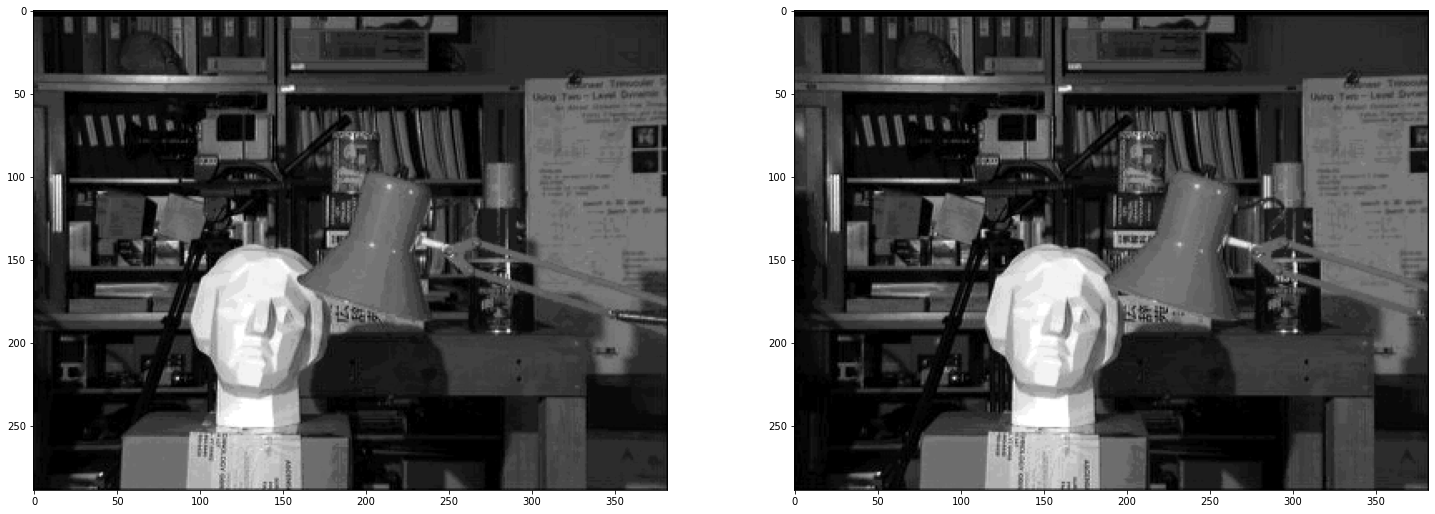

In [2]:
left_image = cv2.imread("./images/l1.png",0)
right_image = cv2.imread("./images/r1.png",0)

_, ax = plt.subplots(nrows=1, ncols=2, figsize=(25, 25))
ax[1].imshow(left_image, cmap="gray")
ax[0].imshow(right_image, cmap="gray")


In [3]:
def sum_of_abs_diff(_left_block, _right_block):
    if _left_block.shape != _right_block.shape:
        return np.inf
    return np.sum(abs(_left_block - _right_block))


def sum_of_sqr_diff(_left_block, _right_block):
    if _left_block.shape != _right_block.shape:
        return np.inf
    return np.sum((_left_block - _right_block) ** 2)

In [4]:
def disparity_map(_left_image, _right_image, _window, _max_offset, criterion):
    height, width = _left_image.shape
    disparity = np.zeros(_left_image.shape)

    MID_PIXEL = int(_window / 2)
    offset_adjust = 255 / _max_offset  # this is used to map depth map output to 0-255 range

    for row in range(MID_PIXEL, height - MID_PIXEL):

        for left_col in range(MID_PIXEL, width - MID_PIXEL):

            left_block = _left_image[row - MID_PIXEL:row + MID_PIXEL + 1,
                         left_col - MID_PIXEL:left_col + MID_PIXEL + 1].astype(int)
            error = np.inf

            # Get search range for the right image
            x_min = max(0, left_col - _max_offset)
            x_max = min(width, left_col + _max_offset)
            for right_col in range(x_min, x_max):

                right_block = _right_image[row - MID_PIXEL:row + MID_PIXEL + 1,
                              right_col - MID_PIXEL: right_col + MID_PIXEL + 1].astype(int)

                _sum = criterion(left_block, right_block)

                if _sum < error:
                    error = _sum
                    disparity[row][left_col] = abs(right_col - left_col) * offset_adjust

    return disparity


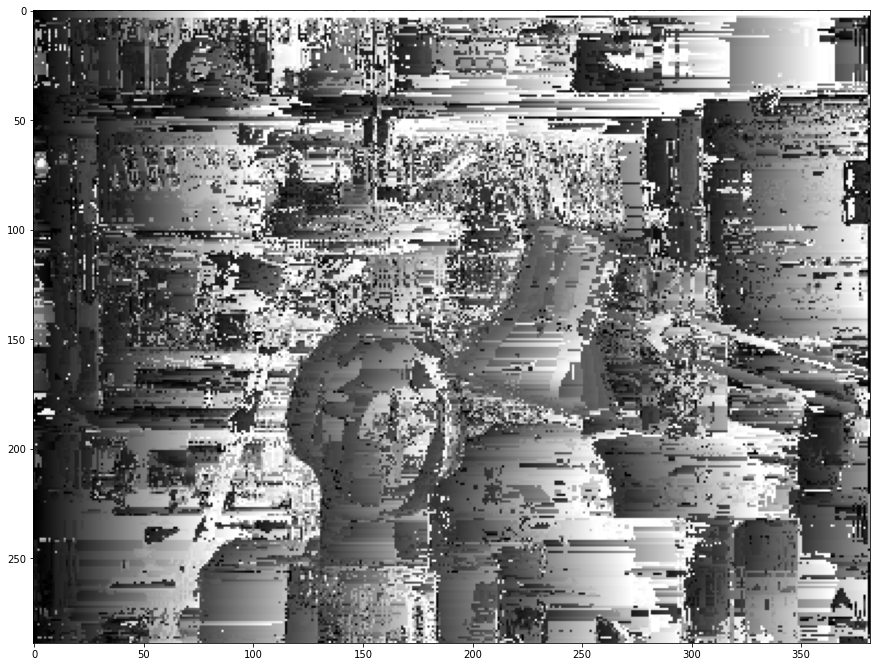

In [5]:
disparity_map_1 = disparity_map(left_image, right_image, _window=1, _max_offset=80,criterion=sum_of_abs_diff)
# cv2.imwrite('d3/disparity_map_1.png',disparity_map_1)
plt.figure(figsize=(15, 15))
plt.imshow(disparity_map_1, 'gray')
plt.show()

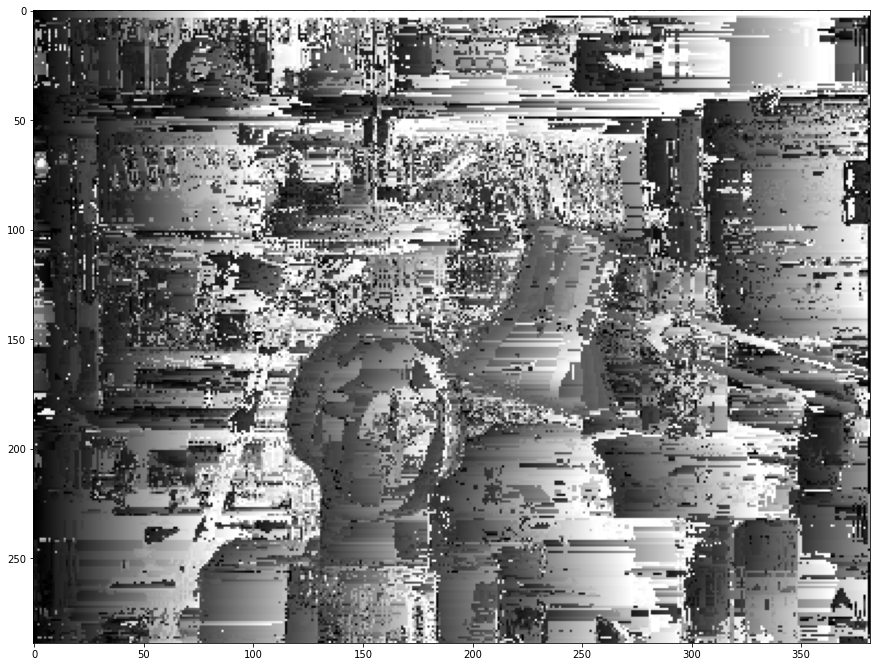

In [6]:
disparity_map_2 = disparity_map(left_image, right_image, _window=1, _max_offset=80, criterion=sum_of_sqr_diff)
# cv2.imwrite('d3/disparity_map_2.png',disparity_map_2)
plt.figure(figsize=(15, 15))
plt.imshow(disparity_map_2, 'gray')
plt.show()

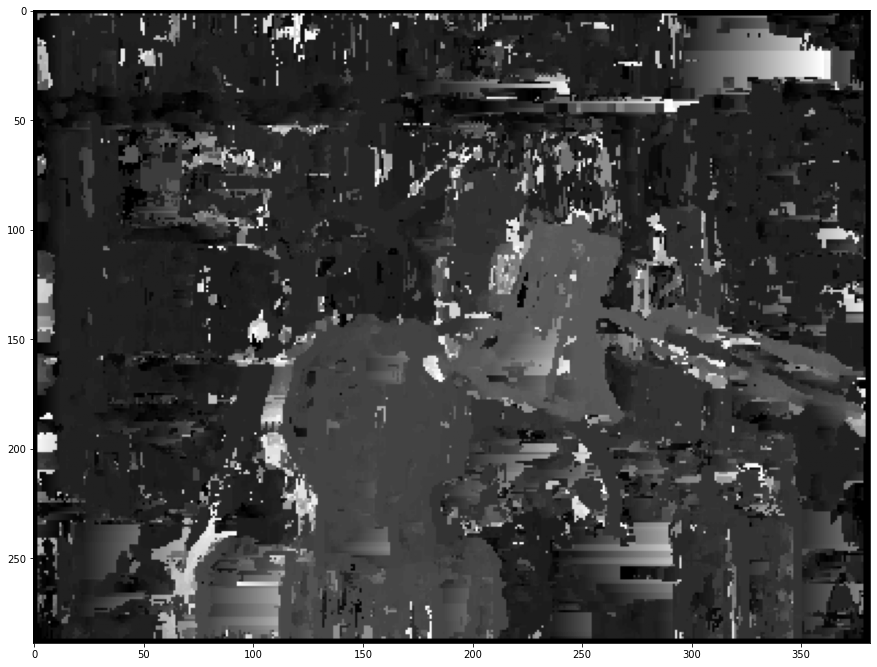

In [7]:
disparity_map_3 = disparity_map(left_image, right_image, _window=5, _max_offset=80, criterion=sum_of_abs_diff)
# cv2.imwrite('d3/disparity_map_3.png',disparity_map_3)
plt.figure(figsize=(15, 15))
plt.imshow(disparity_map_3, 'gray')
plt.show()

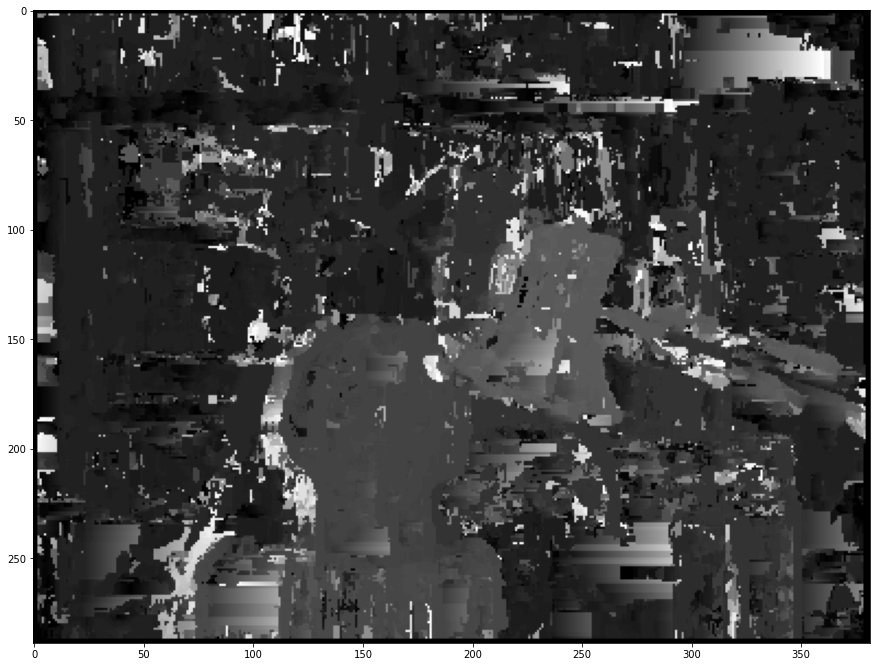

In [8]:
disparity_map_4 = disparity_map(left_image, right_image, _window=5, _max_offset=80, criterion=sum_of_sqr_diff)
# cv2.imwrite('d3/disparity_map_4.png',disparity_map_4)
plt.figure(figsize=(15, 15))
plt.imshow(disparity_map_4, 'gray')
plt.show()

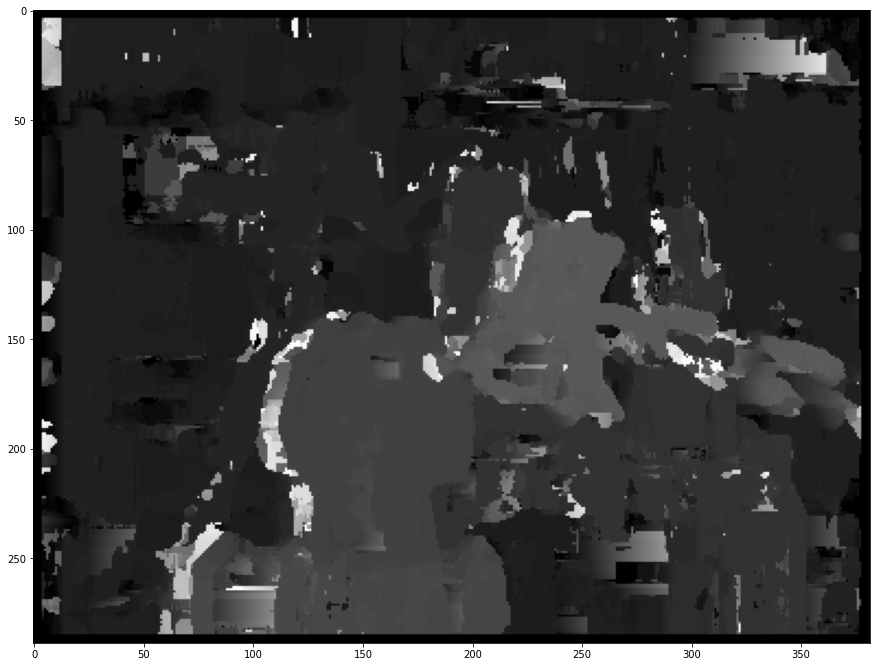

In [9]:
disparity_map_5 = disparity_map(left_image, right_image, _window=9, _max_offset=81, criterion=sum_of_abs_diff)
# cv2.imwrite('d3/disparity_map_5.png',disparity_map_5)
plt.figure(figsize=(15, 15))
plt.imshow(disparity_map_5, 'gray')
plt.show()

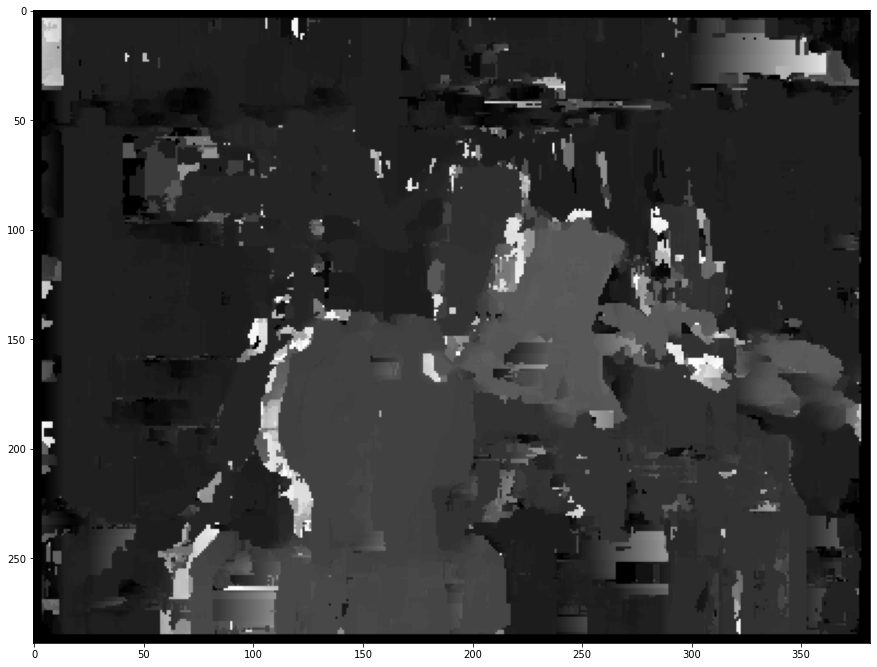

In [10]:
disparity_map_6 = disparity_map(left_image, right_image, _window=9, _max_offset=81, criterion=sum_of_sqr_diff)
# cv2.imwrite('d3/disparity_map_6.png',disparity_map_6)
plt.figure(figsize=(15, 15))
plt.imshow(disparity_map_6, 'gray')
plt.show()

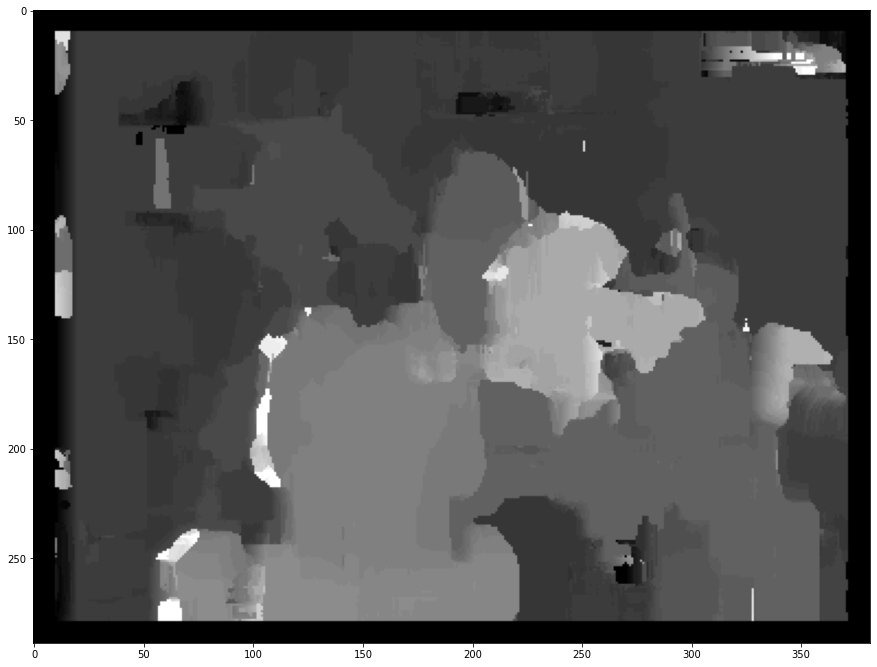

In [49]:
disparity_map_7 = disparity_map(left_image, right_image, _window=21, _max_offset=42, criterion=sum_of_sqr_diff)
plt.figure(figsize=(15, 15))
plt.imshow(disparity_map_7, 'gray')
plt.show()

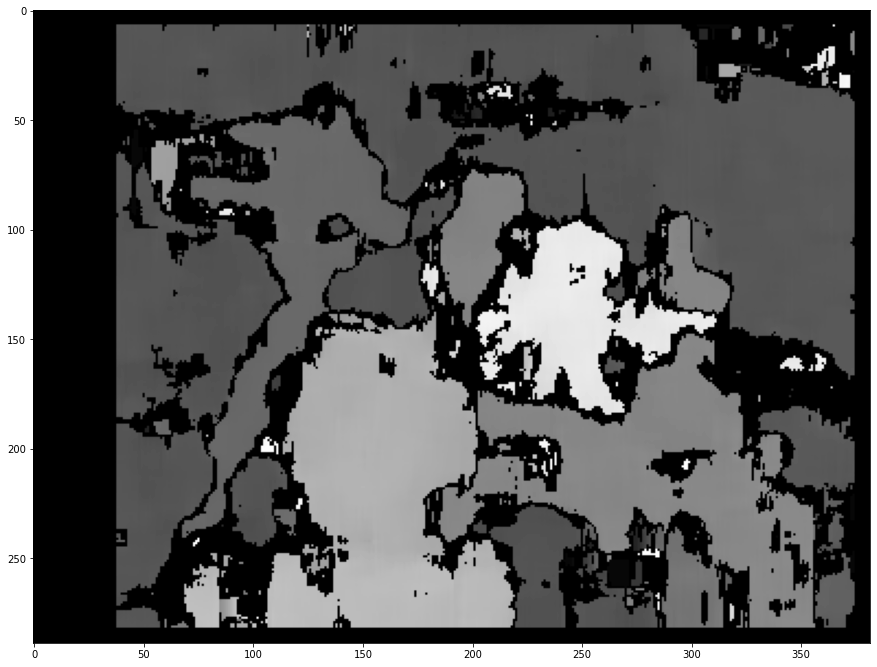

In [52]:
# Parameters

#  Sets the range of disparity values to be searched [min_disparity , num_disparities+min_disparity]
num_disparities = 2*16
# Size of the sliding window used for block matching
block_size = 15
min_disparity = 0

# Stereo BM matcher
left_matcher_BM = cv2.StereoBM_create(
    numDisparities=num_disparities,
    blockSize=block_size
)

# Calculating disparity using the StereoBM algorithm
disp_left = left_matcher_BM.compute(left_image, right_image)
# NOTE: Code returns a 16bit signed single channel image,
# CV_16S containing a disparity map scaled by 16. Hence it
# is essential to convert it to CV_32F and scale it down 16 times.

# Converting to float32
disp_left = disp_left.astype(np.float32)

# Scaling down the disparity values and normalizing them
disp_left = (disp_left/16.0 - min_disparity)/num_disparities

plt.figure(figsize=(15, 15))
plt.imshow(disp_left, 'gray')
plt.show()